In [69]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


## Preporcessing
- subject_entity와 object_entity의 데이터를 전처리하여 dictionary 형태로 변환

In [97]:
# 데이터 불러오기
dataset = pd.read_csv('./../dataset/train/train.csv')
dataset.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [98]:
# 원본 데이터셋에서 subject_entity와 object_entity를 컴파일
# entity(word, start index, end index, type)을 따로 가져와 dictionary 형태로 저장
def get_entity(entity_str):
    entity_str = re.sub('[\{\}:]','',entity_str)

    # get word entity 
    word = re.match('\'word\' .+, \'start_idx\'', entity_str)
    word = word.group()
    word = re.sub('\'word\' ', '', word)
    word = re.sub(', \'start_idx\'', '', word)
    word = word[1:-1]

    # get start_idx, end_idx, type entity list
    entity_str = re.sub('\'word\' ','', entity_str)
    entity_str = re.sub('\'start_idx\' ','', entity_str)
    entity_str = re.sub('\'end_idx\' ','', entity_str)
    entity_str = re.sub('\'type\' ','', entity_str)

    entity_list = entity_str.split(', ')
    entity_list = entity_list[-3:]
    entity_list[0] = int(entity_list[0])
    entity_list[1] = int(entity_list[1])
    entity_list[2] = entity_list[2][1:-1]

    # final entity list
    entity_list.insert(0, word)

    # make values dictionary
    data_dict = dict()
    entities = ['word', 'start_idx', 'end_idx', 'type']
    for i in range(4):
        data_dict[entities[i]] = entity_list[i]
    return data_dict

# 위의 get_entity 함수 대체.. eval 함수로 간단하게 구현할 수 있었다..🥲
def eval_entity(entity_str):
    entity_dict = eval(entity_str)
    return entity_dict

# get_entity 함수를 활용하여 데이터셋의 subject_entity, object_entity의 정보를 dictionary 형태로 치환
def make_entity_dict(df, target_col=['subject_entity', 'object_entity']):
    for col in target_col:
        entities = df[col]
        ent_dicts = []
        for ent in entities:
            ent_dicts.append(eval_entity(ent))
        df[col] = ent_dicts

In [99]:
make_entity_dict(dataset)

In [100]:
dataset.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


## subject_entity
- subject_entity를 df 형태로 불러와 특성 분석

In [101]:
subjects = dataset.subject_entity
sub_df = []
for subject in subjects:
    sub_df.append(list(subject.values()))
sub_df = pd.DataFrame(sub_df, columns=list(subjects[0].keys()))
sub_df
sub_df.to_csv('./subject_entity.csv',index=False)

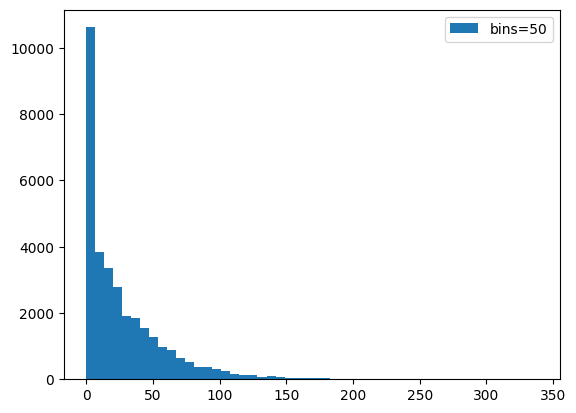

In [102]:
start_sub = list(sub_df.start_idx)
start_sub
plt.hist(start_sub, bins=50, label='bins=50')
plt.legend()
plt.show()

In [103]:
print(len(sub_df[sub_df['start_idx'] > 150]))
print(len(sub_df[sub_df['start_idx'] > 200]))
print(len(sub_df[sub_df['start_idx'] > 250]))
print(len(sub_df[sub_df['start_idx'] > 300]))
print('max start index value in subject : ', max(sub_df['start_idx']))

290
84
32
6
max start index value in subject :  338


## object_entity
- object_entity를 df 형태로 불러와 특성 분석

In [104]:
objects = dataset.object_entity
ob_df = []

for object in objects:
    if len(object.values()) != 4: print(i)
    ob_df.append(list(object.values()))#[:4])
ob_df = pd.DataFrame(ob_df, columns=list(objects[0].keys()))
ob_df
ob_df.to_csv('./object_entity.csv',index=False)

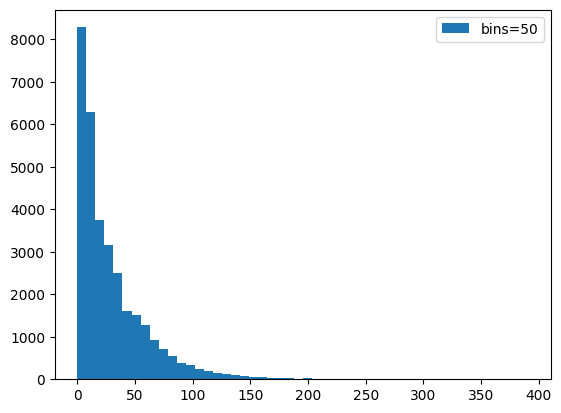

In [105]:
start_ob = list(ob_df.start_idx)
start_ob
# plt.hist(start_ob[:30], label='bins=10')
plt.hist(start_ob, bins=50, label='bins=50')
plt.legend()
plt.show()

In [106]:
print(len(ob_df[ob_df['start_idx'] > 150]))
print(len(ob_df[ob_df['start_idx'] > 200]))
print(len(ob_df[ob_df['start_idx'] > 250]))
print(len(ob_df[ob_df['start_idx'] > 300]))
print('max start index value in object : ', max(ob_df['start_idx']))

304
90
19
4
max start index value in object :  391


#### 두개 동시에 표현

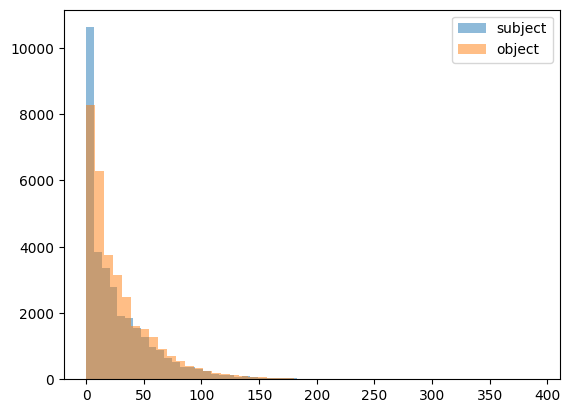

In [107]:
plt.hist(start_sub, bins=50, alpha=0.5, label='subject')
plt.hist(start_ob, bins=50, alpha=0.5, label='object')
plt.legend(loc='upper right')
plt.show()

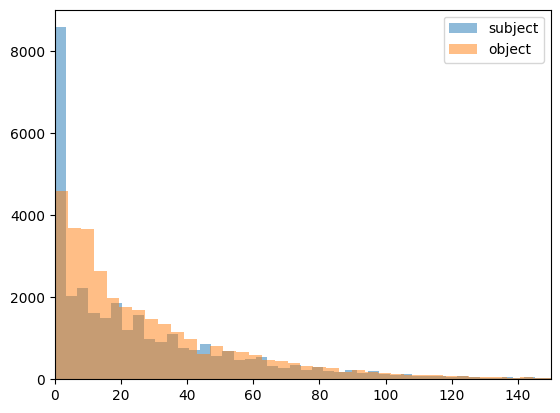

In [108]:
# 임의로 x 축 범위 변경
plt.hist(start_sub, bins=100, alpha=0.5, label='subject')
plt.hist(start_ob, bins=100, alpha=0.5, label='object')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.show()

### 💡 결론
- 타겟으로 봐야할 subject, object 데이터는 대체로 길이 150이내에 등장
- tokenize 해서 몇번째 단어인지로 확인해볼 필요 있음 (-> 추후 진행 예정)

## Subject, Object Type

In [131]:
type_list = list(sub_df.type.unique())
type_list.extend(list(ob_df.type.unique()))
type_list = list(set(type_list))
type_list

['PER', 'DAT', 'ORG', 'POH', 'NOH', 'LOC']

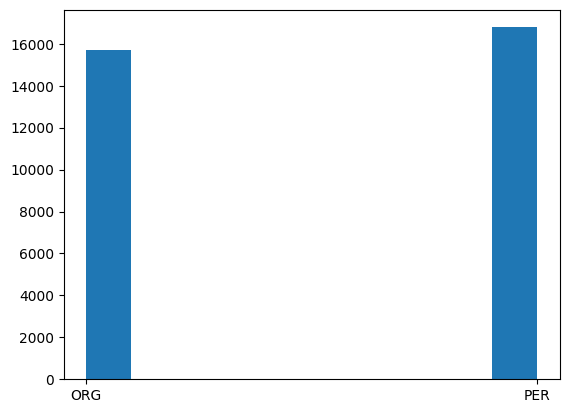

In [135]:
plt.hist(sub_df.type)
plt.xticks = type_list
plt.show()

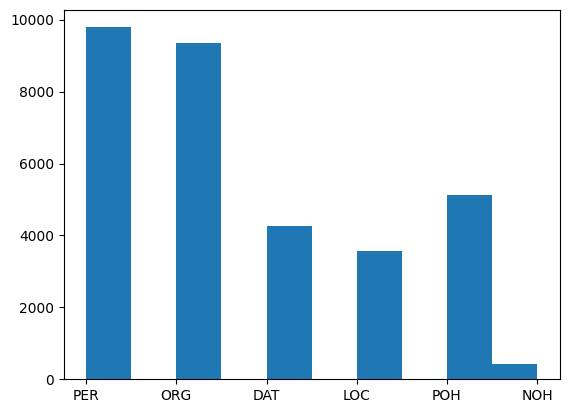

In [134]:
plt.hist(ob_df.type)
plt.show()

### 💡 참고
https://ratsgo.github.io/nlpbook/docs/ner/overview/
- PER : 인물 
- DAT : 날짜
- ORG : 기관 및 단체
- POH : 기타
- NOH : 기타 수량
- LOC : 장소 및 위치

## start_sub - start_ob
- subject와 object의 start index의 차를 구하여 분석
- subject와 object word가 문장에서 어디에 위치하였는지, 거리가 어느정도인지 분석할 수 있다.

In [109]:
start_diff = pd.concat([sub_df.start_idx, ob_df.start_idx], axis=1)
start_diff.columns = ['sub_start', 'ob_start']
start_diff['diff'] = ob_df.start_idx - sub_df.start_idx
start_diff

,sub_start,ob_start,diff
0,24,13,-11
1,19,14,-5
2,21,34,13
3,13,22,9
4,22,0,-22
...,...,...,...
32465,93,100,7
32466,7,17,10
32467,0,7,7
32468,6,21,15


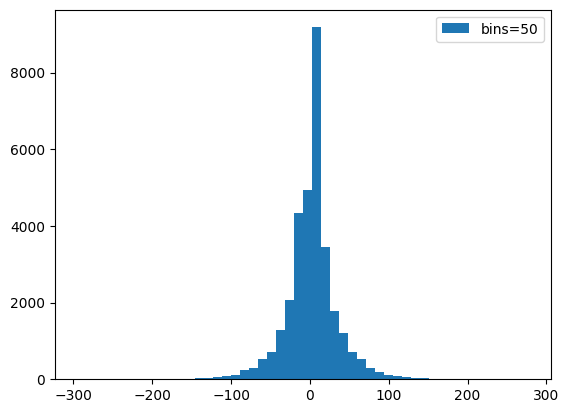

In [110]:
diff = list(start_diff['diff'])

plt.hist(diff, bins=50, label='bins=50')
plt.legend()
plt.show()

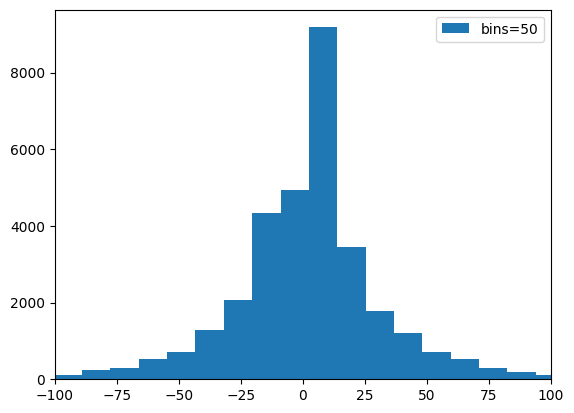

In [111]:
plt.hist(diff, bins=50, label='bins=50')
plt.xlim(-100, 100)
plt.legend()
plt.show()

In [114]:
print(len(start_diff[(start_diff['diff'] > 100) | (start_diff['diff'] < -100)]))
print(len(start_diff[(start_diff['diff'] > 200) | (start_diff['diff'] < -200)]))
print('min index diff : ', min(abs(start_diff['diff']))) # 3 : 적어도 같은 단어를 sub, ob로 활용하는 케이스는 없음을 확인 가능
print('max index diff : ', max(abs(start_diff['diff']))) # 295
print('mean index diff : ', np.mean(start_diff['diff'])) 
print('subject 더 앞 : ', len(start_diff[(start_diff['diff'] > 0)]), 'object 더 앞 : ', len(start_diff[(start_diff['diff'] < 0)])) 


544
22
min index diff :  3
max index diff :  295
mean index diff :  1.714197720973206
subject 더 앞 :  17721 object 더 앞 :  14749


In [ ]:
plt.scatter(sub_df.start_idx-ob_df.start_idx, sub_df.end_idx-ob_df.end_idx, c ="blue")
plt.show()

### 💡 결론
- 문장 내에서 subject가 object보다 항상 앞에존재하는 것은 아님
- 하지만 subject가 문장의 앞에 있는 경우가 더 많음 (하지만 큰 차이는 없음)
- 단어 사이의 거리는 최대 295. 사실상 150 이상의 거리 데이터는 많지 않음

## Token Check

In [19]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    'klue/bert-base', model_max_length=200
)

In [64]:
words_df = pd.concat([sub_df.word, ob_df.word], axis=1)
words_df.columns = ['sub_word', 'ob_word']
words_df.head()

,sub_word,ob_word
0,비틀즈,조지 해리슨
1,민주평화당,대안신당
2,광주FC,한국프로축구연맹
3,아성다이소,박정부
4,요미우리 자이언츠,1967


In [65]:
def get_token_id(word_list):
    token_ids = []
    for word in word_list:
        tokenized = tokenizer(word)
        ids = tokenized['input_ids'][1:-1]
        token_ids.append(tokenizer.convert_ids_to_tokens(ids))
    return token_ids

In [81]:
words_df['sub_token'] = get_token_id(words_df.sub_word)
words_df['ob_token'] = get_token_id(words_df.ob_word)
words_df = words_df[['sub_word', 'sub_token', 'ob_word', 'ob_token']]
words_df

,sub_word,sub_token,ob_word,ob_token
0,비틀즈,[비틀즈],조지 해리슨,"[조지, 해리, ##슨]"
1,민주평화당,"[민주, ##평, ##화, ##당]",대안신당,"[대안, ##신, ##당]"
2,광주FC,"[광주, ##FC]",한국프로축구연맹,"[한국, ##프로, ##축구연맹]"
3,아성다이소,"[아성, ##다이, ##소]",박정부,"[박정, ##부]"
4,요미우리 자이언츠,"[요미우리, 자이언츠]",1967,[1967]
...,...,...,...,...
32465,유기준,"[유기, ##준]",부산 서구·동구,"[부산, 서구, ·, 동구]"
32466,최시형,"[최시, ##형]",손병희,"[손, ##병, ##희]"
32467,완도군,"[완도, ##군]",신우철,"[신우, ##철]"
32468,JTBC,[JTBC],중앙홀딩스,"[중앙, ##홀, ##딩, ##스]"


In [118]:
unk_in_sub = []
for i in range(len(words_df)):
    if '[UNK]' in words_df.sub_token[i]:
        print(i, words_df.sub_word[i], words_df.sub_token[i])
        unk_in_sub.append([i, words_df.sub_word[i], words_df.sub_token[i]])
print(len(unk_in_sub))

21 스티브 바라캇 ['스티브', '[UNK]']
311 카게야마 슌 ['카', '##게', '##야마', '[UNK]']
358 리셴녠 ['[UNK]']
480 바즈겐 사르키샨 ['바', '##즈', '##겐', '[UNK]']
501 데이비드 흄 ['데이비드', '[UNK]']
524 마리오 켐페스 ['마리오', '[UNK]']
591 쟝쩐위 ['[UNK]']
626 넋업샨 ['[UNK]']
713 킵루츠 ['[UNK]']
827 리콴유 ['[UNK]']
841 루디 푈러 ['루', '##디', '[UNK]']
1293 헤르만 뮐러 ['헤르', '##만', '[UNK]']
1321 홋카이도 ['[UNK]']
1360 미겔 후안 세바스티안 피녜라 에체니케 ['미', '##겔', '후안', '세', '##바스', '##티', '##안', '[UNK]', '에', '##체', '##니', '##케']
1414 MŠK 질리나 ['[UNK]', '질리', '##나']
1428 랴오닝 훙윈 ['랴오', '##닝', '[UNK]']
1560 샤를 로뮈알 가르드 ['샤를', '[UNK]', '가르', '##드']
2021 넵투누스 ['[UNK]']
2536 빌헬름 푸르트벵글러 ['빌', '##헬', '##름', '[UNK]']
2553 비욘세 ['[UNK]']
2672 리옌훙 ['[UNK]']
3091 베렝가리오 1세 ['[UNK]', '1', '##세']
3236 RCD 에스파뇰 ['RC', '##D', '[UNK]']
3250 얀 루쳄부르스키 ['얀', '[UNK]']
3306 자니오 꽈드로스 ['자니', '##오', '[UNK]']
3414 키미 래이쾨넨 ['키', '##미', '[UNK]']
3482 로퀜스 ['[UNK]']
3514 뱌체슬라프 몰로토프 ['[UNK]', '몰', '##로', '##토', '##프']
4152 랴오닝 훙윈 ['랴오', '##닝', '[UNK]']
4196 리셴녠 ['[UNK]']
4402 쥘 아르망 ['[UNK]', '아르', '#

In [117]:
unk_in_ob = []
for i in range(len(words_df)):
    if '[UNK]' in words_df.ob_token[i]:
        print(i, words_df.ob_word[i], words_df.ob_token[i])
        unk_in_ob.append([i, words_df.ob_word[i], words_df.ob_token[i]])
print(len(unk_in_ob))

191 少弐氏 ['[UNK]', '[UNK]', '氏']
374 玉置浩二 ['[UNK]', '[UNK]', '[UNK]', '二']
418 KBS 全州放送總局 ['KBS', '全', '州', '[UNK]', '[UNK]', '[UNK]', '[UNK]']
436 토트넘 홋스퍼 ['토트넘', '[UNK]']
534 린뱌오 ['[UNK]']
540 後北条氏 ['後', '北', '[UNK]', '氏']
743 VfB 포르투나 켐니츠 ['V', '##f', '##B', '포르투', '##나', '[UNK]']
1293 Hermann Müller ['Her', '##mann', '[UNK]']
1485 서울動物園 ['서울', '動', '物', '[UNK]']
1797 伊達氏 ['[UNK]', '[UNK]', '氏']
1809 조니 뎁 ['조니', '[UNK]']
1917 숲튽훈 ['[UNK]']
1945 2008–09시즌 리그1 ['2008', '[UNK]', '09', '##시', '##즌', '리그', '##1']
1956 토트넘 홋스퍼 ['토트넘', '[UNK]']
1990 CCTV-4 中文国际 ['CCTV', '-', '4', '中', '文', '[UNK]', '[UNK]']
1991 요미(よみ) ['요미', '(', '[UNK]', ')']
2361 조니 뎁 ['조니', '[UNK]']
2684 쇼니 씨(少弐氏) ['쇼', '##니', '씨', '(', '[UNK]', '[UNK]', '氏', ')']
2717 후지코 후지오 Ⓐ ['후지', '##코', '후지', '##오', '[UNK]']
2725 みゆき ['[UNK]']
2802 쾰른 ['[UNK]']
2825 쿰엔터테인먼트 ['[UNK]']
2911 이스라엘 리숀레지온 ['이스라엘', '[UNK]']
2932 토트넘 홋스퍼 ['토트넘', '[UNK]']
3173 쓰네히토(恒仁) ['쓰', '##네', '##히', '##토', '(', '[UNK]', '仁', ')']
3328 김극효(金克孝) ['김', 

### 💡 결론
- subject word에 [UNK] 있음 : 223
- object word에 [UNK] 있음 : 282
- 전체 데이터 사이즈 : 32470

### 💡 고민해야할 부분
- subject word와 object word가 문장에서 tokenize 되면서 하나의 토큰이 아닌 여러개의 토큰으로 쪼개짐 
- subject word와 object word는 하나의 토큰으로 취급되는 것이 좋지 않을까!
    1. subject word와 object word를 [SUB], [OBJ]와 같은 단어로 마스킹하고 vocab에 추가?
        - 반대로 마스킹 했을 때 유실되는 데이터 정보도 고려해 봐야함
    2. NER을 통해 어떤 객체 명으로 인식하게 하여 학습?
- 모르는 단어로 이루어진 문장
    - 예시 : 숲튽훈, 後北条氏, 요미(よみ)
    1. 전처리를 하여 한자 등의 vocab에 없는 단어 대체?
    2. 위의 [SUB], [OBJ] 마스킹 또는 NER을 통해 처리?

# 아래는 임시 코드입니다
# 만약 배포 파일에 포함되어 있을 경우 고려하지 않으면 됩니다~!

In [45]:
def tokenize(item: pd.Series) -> str:
    """sub, obj entity, sentence를 이어붙이고 tokenize합니다."""
    joined_entity = "[SEP]".join([item["subject_entity"], item["object_entity"]])
    # entity를 인식시켜주는 부분과 문장 부분을 서로 다른 token type id로 구별하기 위해서 joined_entity와 sentence를 따로 넣어줌
    tokenized_sentence = tokenizer(
        joined_entity,
        item["sentence"],
        add_special_tokens=True,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )

    return tokenized_sentence


In [53]:
# type(dataset.iloc[0]['subject_entity'])
dataset.iloc[0]['sentence']

'〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.'

In [59]:
subject_entity = []
object_entity = []
for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1]
    j = j[1:-1].split(',')[0].split(':')[1]
    subject_entity.append(i)
    object_entity.append(j)
out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})

In [60]:
subject_entity

[" '비틀즈'",
 " '민주평화당'",
 " '광주FC'",
 " '아성다이소'",
 " '요미우리 자이언츠'",
 " '북대서양 조약 기구'",
 " 'AC 밀란'",
 " '박용오'",
 " '중화민국'",
 " '안규백'",
 " '하비에르 파스토레'",
 " '빌리 아일리시'",
 " '필라델피아 필리스'",
 " '뉴질랜드'",
 " '미켈란젤로'",
 " '노영민'",
 " '이정미'",
 " '제2총군'",
 " '문성민'",
 " '한국수자원공사'",
 " '김종필'",
 " '스티브 바라캇'",
 " '박흥식'",
 " '맨체스터 시티 FC'",
 " '박병호'",
 " '노소영'",
 " '닛폰햄'",
 " '존 C. 칼훈'",
 " '손병희'",
 " '유럽 축구 연맹'",
 " '미국의 소리'",
 " 'Facebook'",
 " '두레당'",
 " '채리나'",
 " '마누엘 산치스'",
 " '흑표당'",
 " '곡성군'",
 " '경성방직'",
 " '박애리'",
 " 'HB엔터테인먼트'",
 " '강경준'",
 " '스탠 리'",
 " '세비야'",
 " '대원방송'",
 " '경찰청'",
 " '제임스 클라크 로스'",
 " '빌리 파이퍼'",
 " '반민특위'",
 " '드보르작'",
 " '중앙선거관리위원회'",
 " '몽골 인민 공화국'",
 " '자유민주연합'",
 " '김경언'",
 " '공무원연금공단'",
 " '정현왕후'",
 " '프로이센'",
 " '카를 5세'",
 " '추혜선'",
 " '차지연'",
 " '부산대학교'",
 " '곡성군'",
 " '문재인'",
 " '김동성'",
 " '이승만'",
 " '세리에 B'",
 " '목포시'",
 " '현대기아차'",
 " '롯데 자이언츠'",
 " '김기표'",
 " '윌리엄 터너'",
 " '누보톤'",
 " '디에고 베날리오'",
 " '독일 연방군'",
 " '민중당'",
 " '이던 앨런'",
 " '국제축구연맹'",
 " '연갱요'",
 " '문재인